# Intro to TensorFlow

## Importing Libraries

In [11]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

## Data Generation

In [12]:
observations = 1000

xs = np.random.uniform(low=-10, high=10, size=(observations, 1))
zs = np.random.uniform(-10, 10, (observations, 1))

generated_inputs = np.column_stack((xs, zs))

noise = np.random.uniform(-1, 1, (observations, 1))

generated_targets = 2*xs - 3*zs + 5 + noise

np.savez('TF Intro', inputs = generated_inputs, targets = generated_targets)

## Solving with TensorFlow

In [13]:
training_data = np.load('TF Intro.npz')

input_size = 2
output_size = 1

In [23]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(output_size,
        kernel_initializer = tf.random_uniform_initializer(minval = -0.1, maxval = 0.1),
        bias_initializer = tf.random_uniform_initializer(minval=-0.1, maxval=0.1)
    )
])

custom_optimizer = tf.keras.optimizers.SGD(learning_rate=0.02)

model.compile(optimizer = custom_optimizer, loss = 'mean_squared_error')

In [24]:
model.fit(training_data['inputs'], training_data['targets'], epochs = 100, verbose = 2)

Epoch 1/100
32/32 - 1s - 18ms/step - loss: 36.6907
Epoch 2/100
32/32 - 0s - 3ms/step - loss: 1.1566
Epoch 3/100
32/32 - 0s - 3ms/step - loss: 0.4289
Epoch 4/100
32/32 - 0s - 4ms/step - loss: 0.3815
Epoch 5/100
32/32 - 0s - 5ms/step - loss: 0.4301
Epoch 6/100
32/32 - 0s - 4ms/step - loss: 0.3613
Epoch 7/100
32/32 - 0s - 4ms/step - loss: 0.3960
Epoch 8/100
32/32 - 0s - 4ms/step - loss: 0.3898
Epoch 9/100
32/32 - 0s - 4ms/step - loss: 0.3735
Epoch 10/100
32/32 - 0s - 3ms/step - loss: 0.3744
Epoch 11/100
32/32 - 0s - 3ms/step - loss: 0.3919
Epoch 12/100
32/32 - 0s - 3ms/step - loss: 0.3839
Epoch 13/100
32/32 - 0s - 3ms/step - loss: 0.3644
Epoch 14/100
32/32 - 0s - 3ms/step - loss: 0.3887
Epoch 15/100
32/32 - 0s - 3ms/step - loss: 0.3626
Epoch 16/100
32/32 - 0s - 3ms/step - loss: 0.3600
Epoch 17/100
32/32 - 0s - 3ms/step - loss: 0.4254
Epoch 18/100
32/32 - 0s - 3ms/step - loss: 0.3783
Epoch 19/100
32/32 - 0s - 3ms/step - loss: 0.4335
Epoch 20/100
32/32 - 0s - 3ms/step - loss: 0.3628
Epoch 2

## Extracting the Weights

In [25]:
model.layers[0].get_weights()

[array([[ 1.9564735],
        [-2.944549 ]], dtype=float32),
 array([4.9763775], dtype=float32)]

## Making Predictions

In [26]:
model.predict_on_batch(training_data['inputs'])

array([[ 2.09456291e+01],
       [ 1.10653114e+00],
       [-1.10208015e+01],
       [-8.88651943e+00],
       [ 1.82633877e+01],
       [ 4.99699736e+00],
       [-1.32457161e+01],
       [ 2.82774601e+01],
       [ 1.31247158e+01],
       [ 1.47862854e+01],
       [-1.28198891e+01],
       [ 2.63006458e+01],
       [ 5.35799980e-01],
       [-7.10783386e+00],
       [-5.61287689e+00],
       [-1.11324253e+01],
       [-9.99929237e+00],
       [-2.41859989e+01],
       [-1.57668095e+01],
       [ 4.27446823e+01],
       [ 1.35094690e+01],
       [ 1.37803068e+01],
       [ 2.46591187e+01],
       [ 8.88463020e+00],
       [ 1.54939232e+01],
       [ 1.46395607e+01],
       [ 1.73482723e+01],
       [ 6.38774538e+00],
       [-1.73255787e+01],
       [ 2.21105099e+01],
       [ 3.11832962e+01],
       [-3.66807365e+00],
       [ 2.14715862e+00],
       [ 1.31899319e+01],
       [ 1.89524879e+01],
       [ 1.09383459e+01],
       [ 6.96716309e-01],
       [ 1.24250059e+01],
       [-2.6

## Plotting Data

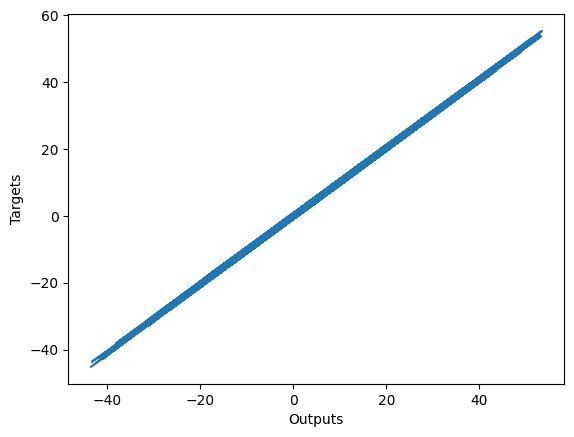

In [27]:
plt.plot(np.squeeze(model.predict_on_batch(training_data['inputs'])), np.squeeze(training_data['targets']))
plt.xlabel('Outputs')
plt.ylabel('Targets')

plt.show()